In [1]:
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def noise(s):
    rand = random.uniform(0.001,0.999)
    return s * math.log((1 - rand)/rand)

In [5]:
def time_to_pulses(time, t_0 = 0.011, a = 1.1, b = 0.015):
    pulses = 0
    pulse_duration = t_0
    while time >= pulse_duration:
        time = time - pulse_duration
        pulses += 1
        pulse_duration = a * pulse_duration + noise(b * a * pulse_duration)
    return pulses

In [11]:
time_to_pulses(8)

45

In [12]:
def pulses_to_time(pulses, t_0 = 0.011, a = 1.1, b = 0.015):
    time = 0
    pulse_duration = t_0
    while pulses > 0:
        time = time + pulse_duration
        pulses = pulses - 1
        pulse_duration = a * pulse_duration + noise(b * a * pulse_duration)
    return time

In [16]:
pulses_to_time(45)

8.068089751979269

In [30]:
def peak(t, reps = 10, n_training = 10, n_trials = 100):
    results = pd.DataFrame(columns = ['rep', 'val'])
    for rep in range(reps):
        goal_pulses = 0
        for i in range(n_training):
            goal_pulses += time_to_pulses(t)
        goal_pulses = goal_pulses / n_training
        for i in range(n_trials):
            val = pulses_to_time(goal_pulses)
            results.loc[len(results)] = [rep, val]
    return results['val']

In [31]:
res8 = peak(8)
res12 = peak(12)
res21 = peak(21)

In [32]:
print(res8)

0       9.530615
1      10.053820
2       7.445170
3       8.648976
4       9.968219
         ...    
995     7.796084
996     7.898107
997     9.438392
998     5.966215
999     8.076310
Name: val, Length: 1000, dtype: float64


/Users/niels/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """


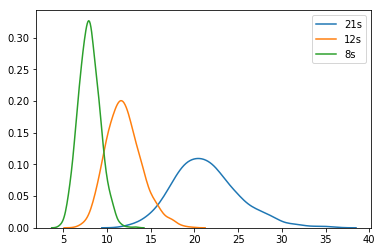

In [33]:
sns.kdeplot(np.array(res21), label="21s")
sns.kdeplot(np.array(res12), label="12s")
sns.kdeplot(np.array(res8), label="8s")


In [34]:
res21s = res21 / 21
res12s = res12 / 12
res8s = res8 /8

/Users/niels/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """


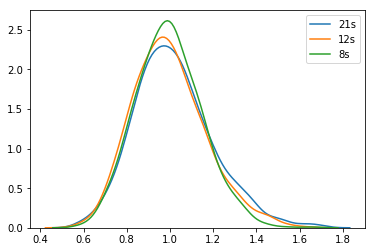

In [35]:
sns.kdeplot(np.array(res21s), label="21s")
sns.kdeplot(np.array(res12s), label="12s")
sns.kdeplot(np.array(res8s), label="8s")
